<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/MachineLearnong/Ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing dependencies

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# reading the csv files created in data_cleaning_and_merging module
combined_oz_weather_data = pd.read_csv('combined_oz_weather_data.csv')
combined_oz_weather_data.head()

,date,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,Ozone(ppm)
0,2015-01-01,2,70,13,98,87,0.2,1025,10,4,1,3.8,0.007882
1,2015-01-02,4,137,13,99,89,0.1,1019,8,5,4,3.8,0.006471
2,2015-01-03,7,277,11,35,78,0.1,1016,9,14,3,7.1,0.021882
3,2015-01-04,6,218,17,2,67,0.0,1030,10,8,2,8.7,0.028625
4,2015-01-05,3,93,10,1,56,0.0,1036,10,8,-2,8.7,0.022042


In [6]:
combined_oz_weather_data['Ozone(ppm)'] = combined_oz_weather_data['Ozone(ppm)'] * 100

In [8]:
# checking for null values (missing values)
combined_oz_weather_data.isnull().sum()

date             0
avgtempC         0
winddirDegree    0
windspeedKmph    0
cloudcover       0
humidity         0
precipInches     0
pressure         0
visibility       0
maxtempC         0
mintempC         0
sunHour          0
Ozone(ppm)       0
dtype: int64

In [9]:
# Data information
combined_oz_weather_data.describe()

,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,Ozone(ppm)
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,20.676471,155.815456,13.654556,39.960208,68.903691,0.067647,1016.309112,9.445790,25.690311,16.265283,10.099077,3.186876
std,7.755106,62.193428,5.043154,29.062543,14.203145,0.196705,5.590999,1.427292,8.294309,7.450857,2.902771,1.019763
min,-3.000000,0.000000,3.000000,0.000000,22.000000,0.000000,1001.000000,4.000000,0.000000,-7.000000,3.800000,0.323800
25%,15.000000,125.000000,10.000000,15.000000,59.000000,0.000000,1013.000000,9.000000,20.000000,11.000000,8.700000,2.460275
50%,22.000000,166.000000,13.000000,35.000000,70.000000,0.000000,1015.000000,10.000000,27.000000,18.000000,10.800000,3.079450
75%,27.000000,186.000000,17.000000,62.000000,80.000000,0.100000,1019.000000,10.000000,32.000000,23.000000,12.200000,3.866325
max,35.000000,349.000000,40.000000,100.000000,95.000000,3.400000,1040.000000,20.000000,42.000000,28.000000,14.100000,6.835300


<ipython-input-11-c655fb1d9e2b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



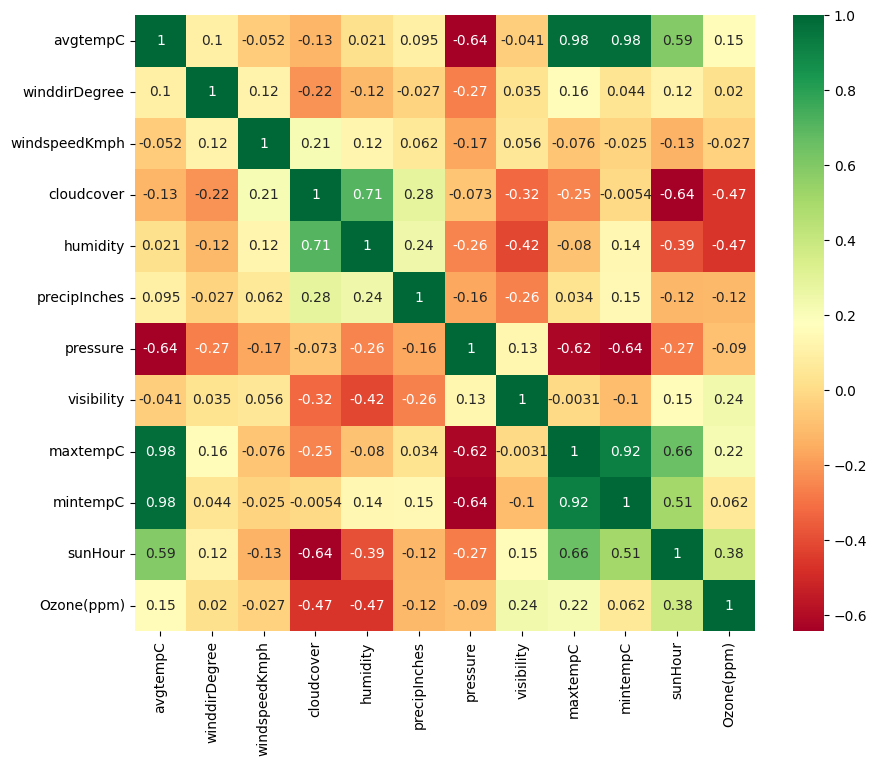

In [11]:
# graphical representation of correlation
corrmat = combined_oz_weather_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))

#plot heat map (Visualization)
g = sns.heatmap(combined_oz_weather_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# selecting the independent and dependent features
X = combined_oz_weather_data[['maxtempC', 'humidity', 'winddirDegree', 'windspeedKmph', 'cloudcover']] ## independent features
y = combined_oz_weather_data['Ozone(ppm)']  ## dependent features

In [13]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
X.head()

,maxtempC,humidity,winddirDegree,windspeedKmph,cloudcover
0,4,87,70,13,98
1,5,89,137,13,99
2,14,78,277,11,35
3,8,67,218,17,2
4,8,56,93,10,1


In [17]:
y.head()

0    0.7882
1    0.6471
2    2.1882
3    2.8625
4    2.2042
Name: Ozone(ppm), dtype: float64

<ipython-input-18-0f415a98584e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

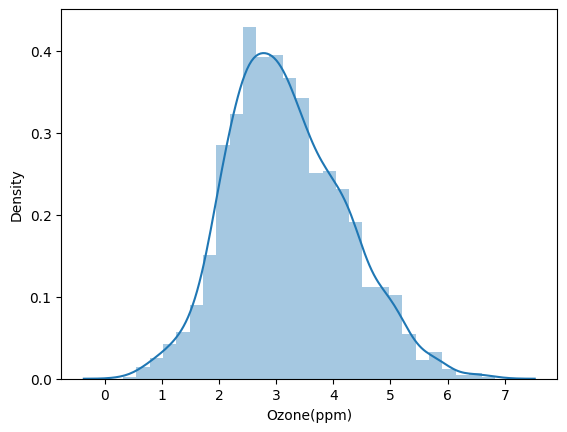

In [18]:
sns.distplot(y)

# Linear Regression

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [37]:
# selecting all features to begin with
X = combined_oz_weather_data[['avgtempC', 'winddirDegree', 'windspeedKmph', 'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility', 'maxtempC', 'mintempC', 'sunHour']]
y = combined_oz_weather_data['Ozone(ppm)']  ## dependent features

In [38]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [39]:
result = pd.DataFrame(list(zip(model.coef_, combined_oz_weather_data.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
humidity,0.137804
maxtempC,0.110235
date,0.097464
precipInches,0.042010
mintempC,0.029815
pressure,0.023737
cloudcover,0.021024
winddirDegree,0.011400
windspeedKmph,0.006327


In [40]:
scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)
stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [41]:
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, combined_oz_weather_data.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,0.821109
date,0.755626
cloudcover,0.298527
precipInches,0.234810
windspeedKmph,0.183837
avgtempC,0.174047
mintempC,0.086521
winddirDegree,0.057478
pressure,0.033870


In [42]:
# selecting features
X = combined_oz_weather_data[['maxtempC', 'cloudcover', 'precipInches', 'windspeedKmph', 'avgtempC']] #independent features
y = combined_oz_weather_data['Ozone(ppm)']  ## dependent features

In [43]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
# coefficient for X and and the y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [ 0.0606969  -0.01437077  0.10691246  0.01793258 -0.04746398]
intercept:  2.931860697334592


In [46]:
y_train_predictions = lm.predict(X_train)

In [47]:
y_test_predictions = lm.predict(X_test)

<ipython-input-48-562ae174378b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

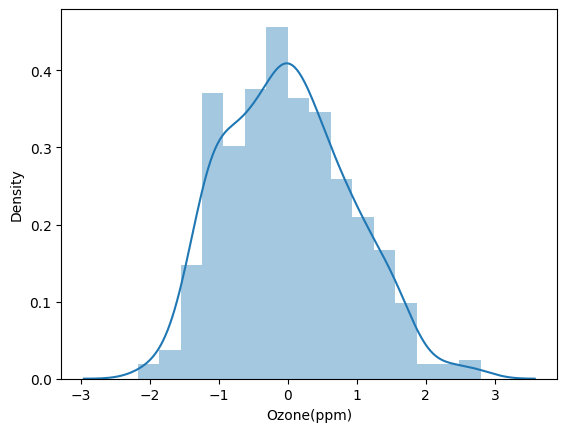

In [48]:
sns.distplot(y_test - y_test_predictions)

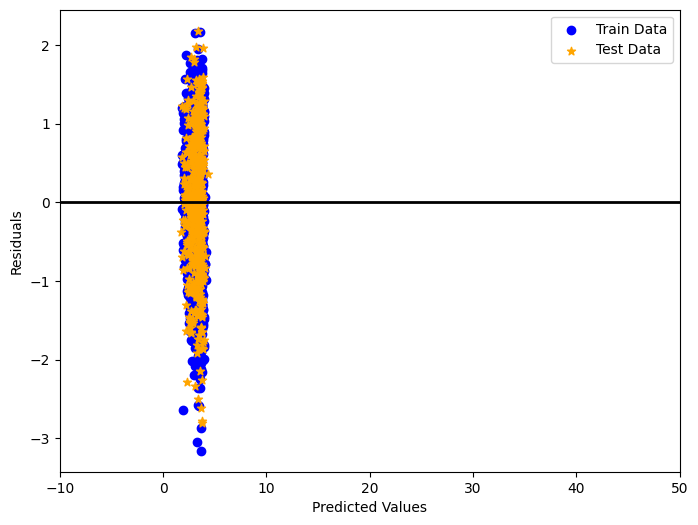

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions - y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

In [52]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))
print('MSE for training data: ', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for training data: 0.777337071761591
MSE for training data:  0.8232607454100238


In [54]:
from sklearn.metrics import r2_score
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on train set: 0.24404122824683028
Coefficient of determination R^2 <-- on test set: 0.22670180420334818


## Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [57]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression()

In [58]:
y_pred = polyreg.predict(poly.fit_transform(X_test))

In [60]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_pred))

R-Square Error associated with Polynomial Regression is: 0.31663879692025576
MSE for testing data: 0.7275129522992698


## Lasso Regression

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [63]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.8074648433184424


In [64]:
prediction_lasso = lasso_regressor.predict(X_test)

<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

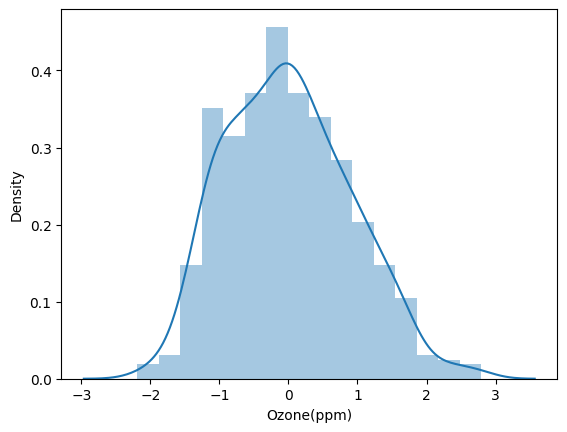

In [65]:
sns.distplot(y_test - prediction_lasso)

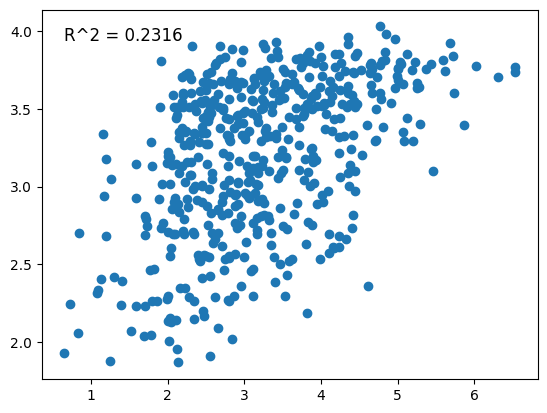

MAE: 0.7345638207682459
MSE: 0.8180818948241446
RMSE: 0.9044787973325548


In [71]:
r_squared = r2_score(y_test, prediction_lasso)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_lasso), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_lasso)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

## Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [73]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [74]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-0.8094665811172606


In [75]:
# Linear Regression
lm1 = LinearRegression()
mse = cross_val_score(lm1, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.8123263935869185


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf = RandomForestRegressor()

In [79]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9093661044298628
Coefficient of determination R^2 <-- on test set: 0.3673832665419452


In [82]:
score = cross_val_score(rf, X, y, cv=5)

In [83]:
score.mean()

0.300006892400791

In [84]:
RandomForestRegressor()

RandomForestRegressor()

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [87]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [88]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [89]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

In [90]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [91]:
rf1_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
rf1_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [93]:
rf1_random.best_score_

-0.6079948691125616

In [94]:
prediction_rf1 = rf1_random.predict(X_test)

<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

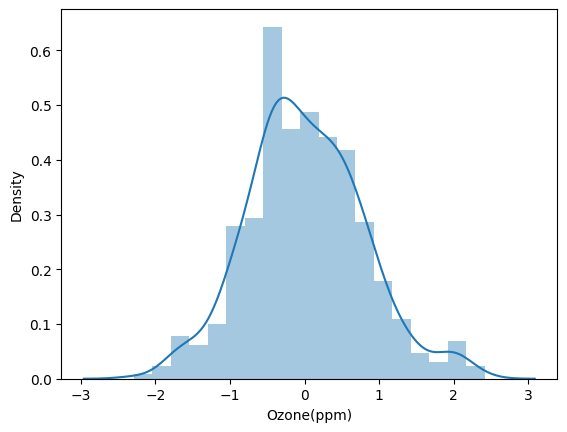

In [95]:
sns.distplot(y_test - prediction_rf1)

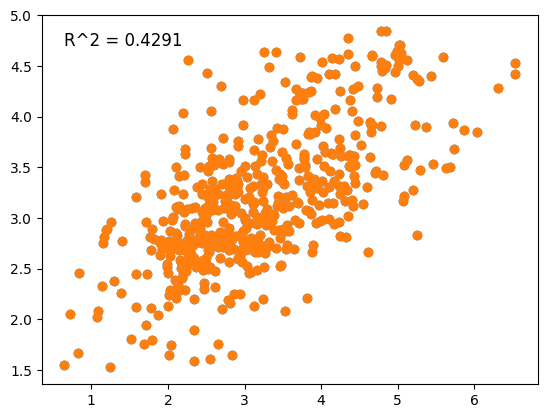

In [98]:
r_squared = r2_score(y_test, prediction_rf1)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_rf1), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_rf1)

plt.scatter(y_test, prediction_rf1)
plt.show()

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf1))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf1)))

MAE: 0.6164818942787551
MSE: 0.607780564942871
RMSE: 0.7796028251249933
